# Segmentasi CNN

In [15]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras. layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
import tensorflow.keras.backend as K

In [16]:
def image_show_two(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1)
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2)
    ax2.set(xticks = [], yticks = [], title = title2)

In [17]:
def image_show_one(image1, title1= ""): 
    fig = plt.figure(figsize = (15, 15)) 
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1)
    ax1.set(xticks = [], yticks = [], title = title1)

def display(img, title=""):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [18]:
import sys
car_path = "D:/UTY/Semester 7/Pengembangan Aplikasi AI/Pengenal-Citra-Nomor-Kendaraan/Dataset/K1/K1_AB2433TF.JPG"
car_path = car_path or sys.exit("Path tidak boleh kosong")

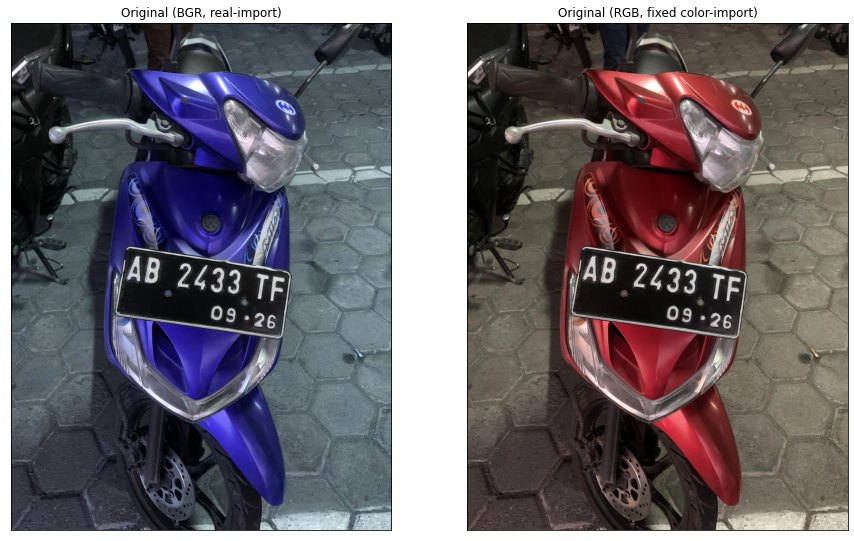

In [19]:
image = cv2.imread(car_path)
RGB_img = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)
plot_image = image_show_two(image, RGB_img, title1 = "Original (BGR, real-import)", title2 = "Original (RGB, fixed color-import)")

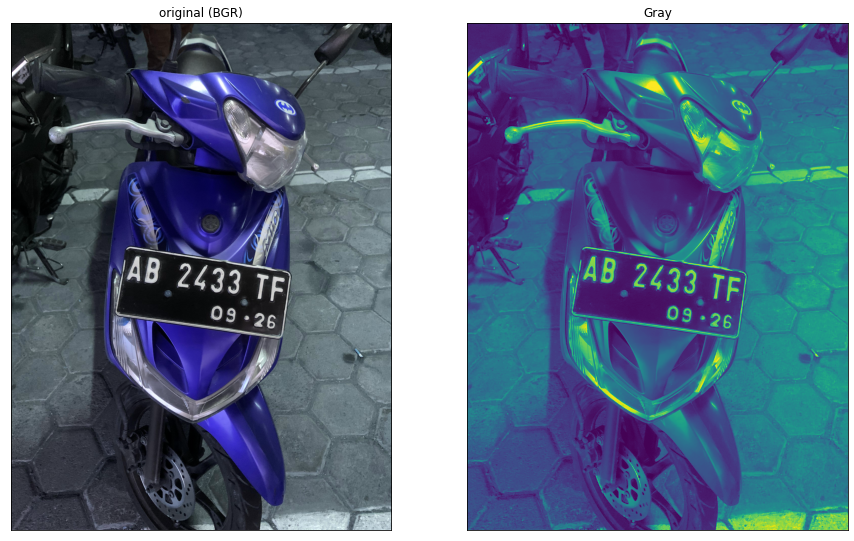

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_show_two(image, gray, title1 = "original (BGR)", title2 = "Gray")

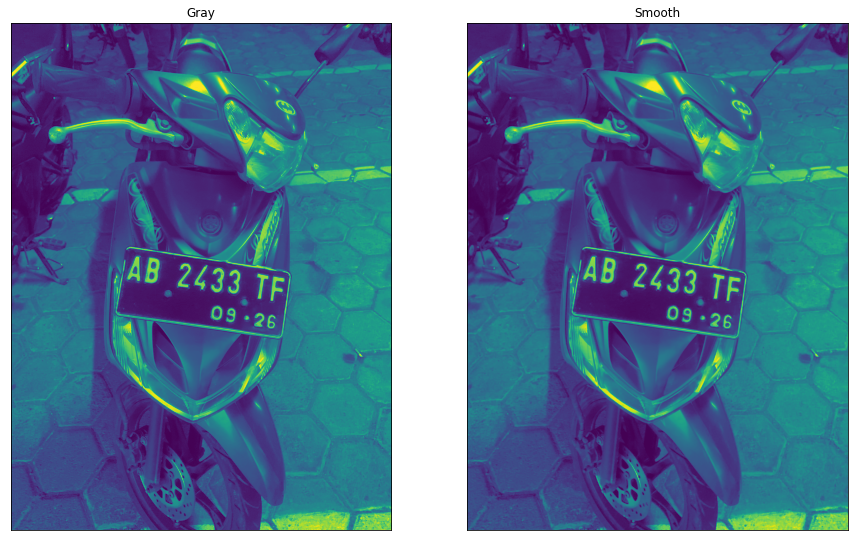

In [21]:
smooth = cv2.bilateralFilter (gray, 9, 75, 75)
image_show_two(gray, smooth, title1= "Gray", title2 = "Smooth")

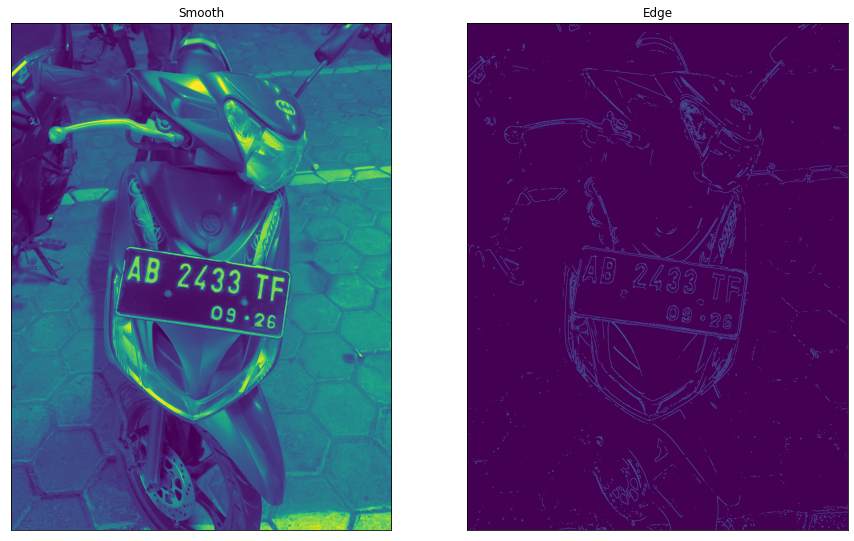

In [34]:
edge = cv2.Canny(smooth, 70, 70)
image_show_two(smooth, edge, title1 = "Smooth", title2 = "Edge")

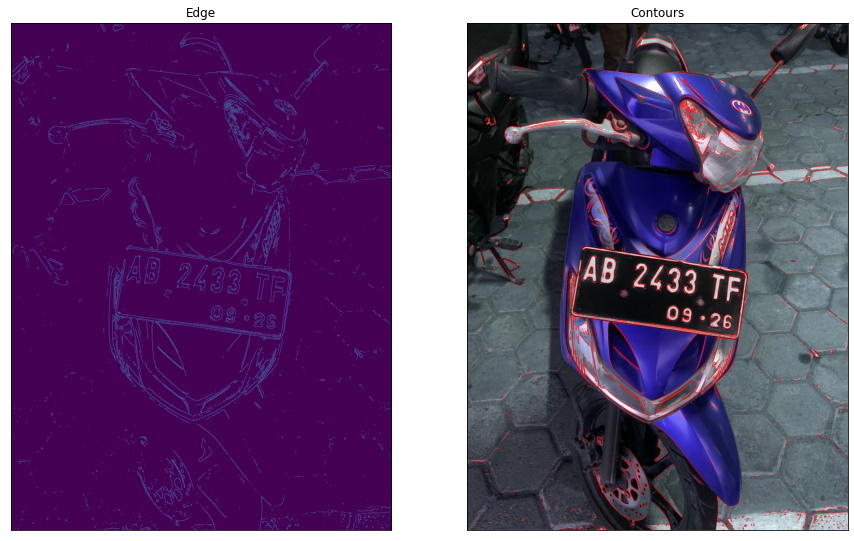

In [35]:
contours_first, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours_first, -1, (255, 0, 0), 2)
image_show_two(edge, image_copy, title1="Edge", title2="Contours")


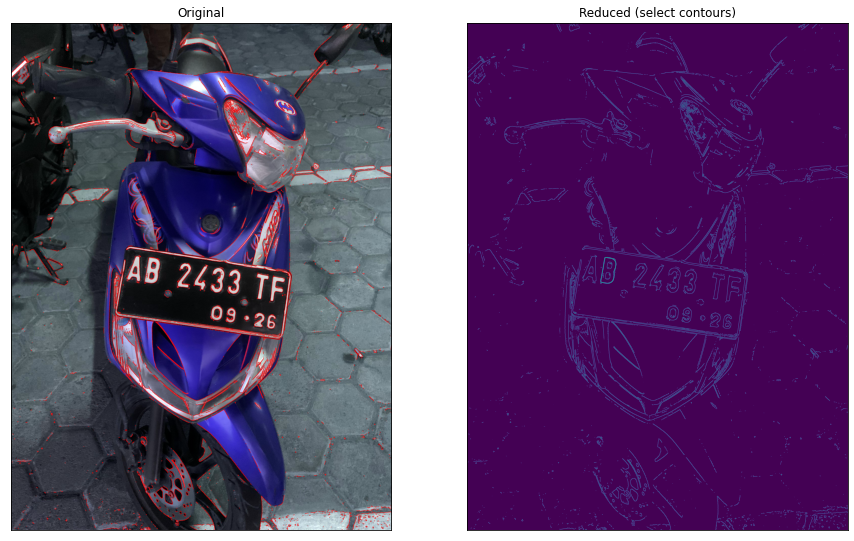

In [36]:
import sys
specified_total_contour = 5#@param {type: "integer"}
specified_total_contour = specified_total_contour or sys.exit("Tidak boleh kosong")

contours = sorted(contours_first, key = cv2.contourArea, reverse=True) [:specified_total_contour]
image_reduced = edge.copy()
cv2.drawContours(image_reduced, contours, 1, (255, 0, 0), 2)
image_show_two(image_copy, image_reduced, title1 = "Original", title2 = "Reduced (select contours)")

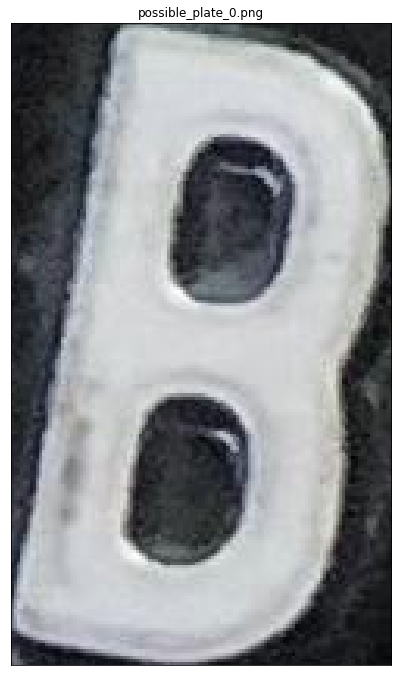

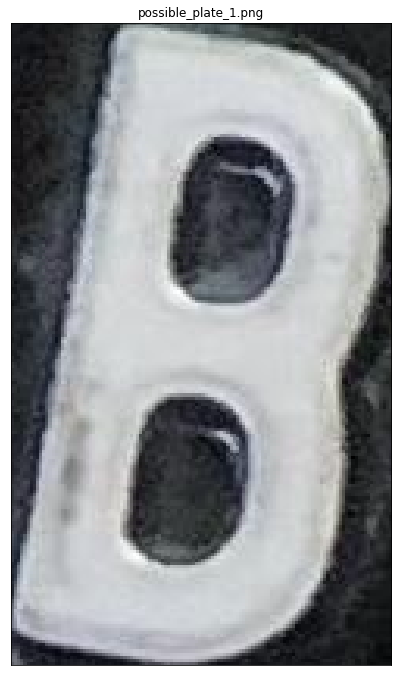

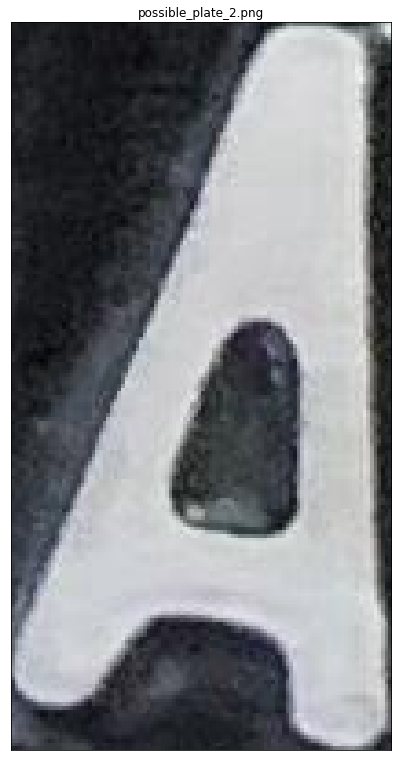

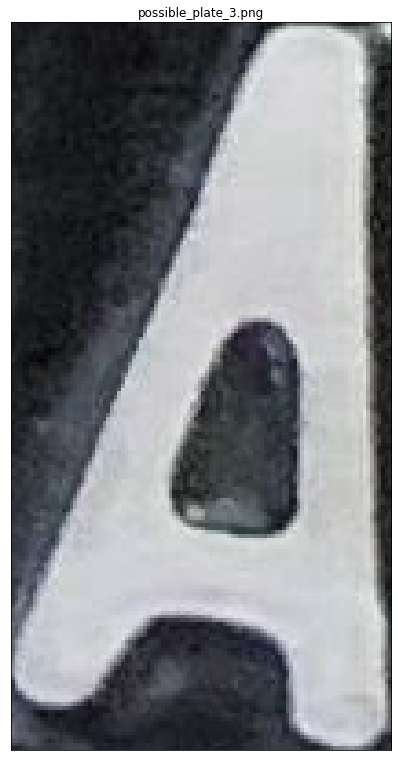

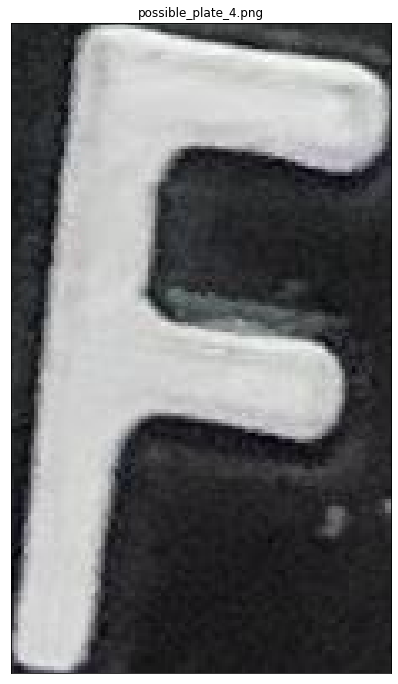

In [37]:
plate = None
loop_contour_counter = 0

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.02 * a, True)
    x, y, w, h = cv2.boundingRect(i)
    plate = image[y:y+h, x:x+w]
    cv2.imwrite("possible_plate_" + str(loop_contour_counter) + ".png", plate)
    image_show_one(plate, "possible_plate_" + str(loop_contour_counter) + ".png")
    loop_contour_counter += 1


In [26]:
# import sys
# plate_cascade_path="D:/UTY/Semester 7/Pengembangan Aplikasi AI/Pengenal-Citra-Nomor-Kendaraan/Dataset/K1/license_plate.xml"
# plate_cascade_path = plate_cascade_path or sys.exit("Path tidak boleh kosong")
# plate_cascade = cv2.CascadeClassifier (plate_cascade_path)

In [27]:
# import cv2

# def detect_plate(img, text=" "):
#     plate_img = img.copy()
#     roi = img.copy()
#     plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.1, minNeighbors=5)

#     for (x, y, w, h) in plate_rect:
#         roi_ = roi[y:y+h, x:x+w, :]
#         plate = roi[y:y+h, x:x+w, :]
#         cv2.rectangle(plate_img, (x+2, y), (x+w-3, y+h-5), (51, 181, 155), 3)  
#     if text != " ":
#         plate_img = cv2.putText(plate_img, text, (x - w // 2, y - h // 2),
#                     cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (51, 181, 155), 1, cv2.LINE_AA)

#     return plate_img, plate


In [28]:
# import sys

# plate_choice_path = "/content/possible_plate_2.png"  # Ubah sesuai dengan path gambar Anda
# plate_choice_path = plate_choice_path or sys.exit("Gambar tidak dapat dibaca atau tidak ditemukan.")

# # Membaca dan menampilkan gambar
# img = cv2.imread(plate_choice_path)
# display(img, plate_choice_path)

In [29]:
# # Kode di bawah ini
# output_img, plate = detect_plate(img)
# display(output_img, 'detected plate')
# display(plate, 'extracted with ROI')
